In [10]:
import pandas as pd
df=pd.read_csv('sales_dataset.csv')

In [12]:
df

,OrderID,OrderDate,Product,Quantity,Price,Total
0,1,"June 13, 2025 03:01",Widget,"7,6",144.61,1099.036
1,2,2025-03-04,Gadget,15 шт,285.01,4275.150
2,3,2025-06-23,Gadget,11 units,"197,63",2173.930
3,4,2025-06-01,Widget,"8,8",486.14,4278.032
4,5,2025-01-24,NaN,7,425.97,2981.790
...,...,...,...,...,...,...
95,96,2025-02-04,Gadget,16 units,275.31,4404.960
96,97,"May 22, 2025 04:17",Gadget,"5,4",350.93,1895.022
97,98,"June 04, 2025 06:45",Gadget,"3,4","121,99",414.766
98,99,"February 22, 2025 21:40",Gadget,12,95.73,1148.760


<Axes: >

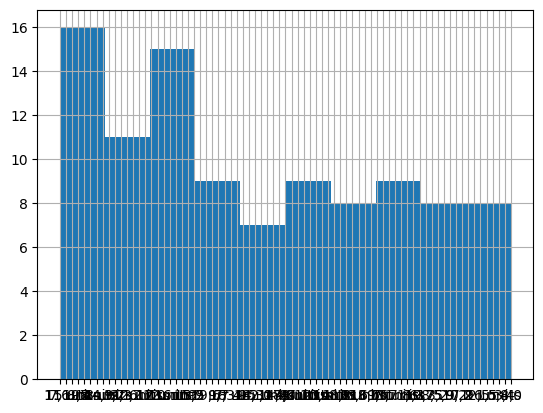

In [15]:
df['Quantity'].hist()

In [4]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], dayfirst=True, errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderID    100 non-null    int64         
 1   OrderDate  22 non-null     datetime64[ns]
 2   Product    68 non-null     object        
 3   Quantity   100 non-null    object        
 4   Price      100 non-null    object        
 5   Total      94 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 4.8+ KB


In [6]:
df['Product'] = df['Product'].fillna('Unknown')

In [7]:
df['Quantity_clean'] = (
    df['Quantity']
    .str.extract(r'(\d+[\.,]?\d*)')[0]
    .str.replace(',', '.')
    .astype(float)
)

In [8]:
df['Price_clean'] = (
    df['Price']
    .str.replace(' ', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)


In [ ]:
df['Total_recomputed'] = df['Quantity_clean'] * df['Price_clean']
# Fill missing Total with recomputed values
df['Total'] = df['Total'].fillna(df['Total_recomputed'])

In [17]:
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = df['Total'].between(lower_bound, upper_bound)
df_clean = df.loc[mask].copy()